In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

### BALANCED DATASET

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Disso/creditcard_2023.csv')
df

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1


In [ ]:
df['Class'].value_counts()

,count
Class,
0,284315
1,284315


In [ ]:
df.drop(columns=['id'], inplace=True)

In [ ]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


### IMBALANCED DATASET

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Disso/creditcards.csv')
df2

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
df2['Class'].value_counts()

,count
Class,
0,284315
1,492


In [ ]:
df2 = df2.drop(columns=['Time'])

In [ ]:
df2.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### COMBINE DATASETS

In [ ]:
double = pd.concat([df, df2])
double

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
double['Class'].value_counts()

,count
Class,
0,568630
1,284807


In [ ]:
print("DataFrame structure:")
print(double.info())


print("\nExample data from each feature:")
print(double.head())


DataFrame structure:
<class 'pandas.core.frame.DataFrame'>
Index: 853437 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      853437 non-null  float64
 1   V2      853437 non-null  float64
 2   V3      853437 non-null  float64
 3   V4      853437 non-null  float64
 4   V5      853437 non-null  float64
 5   V6      853437 non-null  float64
 6   V7      853437 non-null  float64
 7   V8      853437 non-null  float64
 8   V9      853437 non-null  float64
 9   V10     853437 non-null  float64
 10  V11     853437 non-null  float64
 11  V12     853437 non-null  float64
 12  V13     853437 non-null  float64
 13  V14     853437 non-null  float64
 14  V15     853437 non-null  float64
 15  V16     853437 non-null  float64
 16  V17     853437 non-null  float64
 17  V18     853437 non-null  float64
 18  V19     853437 non-null  float64
 19  V20     853437 non-null  float64
 20  V21     853437 non-null  float64

<ipython-input-50-d83a71c9a9b2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=double, palette=colors)


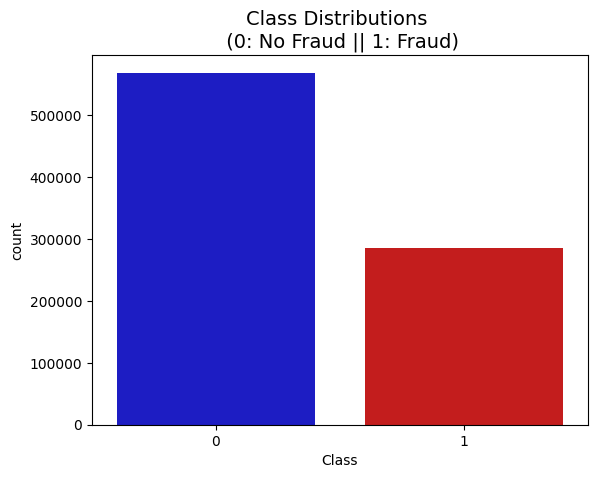

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = ["#0101DF", "#DF0101"]

sns.countplot(x='Class', data=double, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.show()

### SCALE COMBINED DATASET

In [ ]:
from sklearn.preprocessing import RobustScaler

# Scaling amountcolumn with robustscaler
new_df=double.copy()
new_df['Amount'] = RobustScaler().fit_transform(new_df['Amount'].to_numpy().reshape(-1,1))
new_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,0.798462,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,0.032472,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,-0.236299,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,-0.044251,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,0.550743,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.404389,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.402782,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.399900,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.403772,0


In [ ]:
new_df = new_df.sample(frac=1, random_state=1)
new_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
270208,1.718599,-0.589054,-0.185749,-1.052096,1.284316,2.230528,0.122587,0.088083,1.282263,0.339534,...,-0.211029,-0.667493,0.403089,1.220853,-0.814076,-0.617152,-0.186886,-0.138781,0.787092,0
556627,-0.155695,0.184567,-0.233523,0.156068,0.285978,-0.413230,0.258298,-0.064827,-0.298250,-0.208483,...,0.089087,0.627579,0.037615,-0.265237,-0.816814,-0.999161,0.582540,0.752811,0.826326,1
384984,-0.473044,-0.771314,-0.609088,0.489438,-0.744186,0.775617,0.391181,-0.542558,0.026346,-0.569952,...,0.018781,-0.512693,-2.660732,0.020217,-0.991074,0.210886,0.893675,0.049897,0.932619,1
101170,1.042766,-0.457301,0.744927,-0.755154,0.071905,0.183963,0.345890,-0.161088,0.525314,0.571061,...,-0.141421,-0.280793,0.011065,0.202138,0.169551,1.816592,-0.317258,-0.105551,0.816859,0
176373,-1.956574,2.101941,0.453091,-1.159029,0.018464,-0.883012,0.706348,-0.354128,1.854630,1.034015,...,-0.464003,-0.552554,-0.012995,-0.080070,0.038542,-0.370348,-0.333400,-0.323682,-0.404425,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491263,-1.003034,0.523233,-0.850480,0.458508,-0.866442,-0.191992,-0.451548,0.395405,-1.003115,-0.521047,...,0.317286,-0.768852,0.575190,-0.081693,-0.316467,3.016707,-0.926670,-0.536904,1.037500,1
222994,-0.968684,1.223178,0.244740,-1.728395,1.722377,-0.408492,1.332043,-0.097056,-0.614712,-1.555587,...,0.193509,0.499596,-0.865807,-1.214576,1.305559,-0.120824,-0.131202,0.028431,-0.404111,0
470924,-1.225451,1.101467,-1.371140,1.778787,-1.574868,-1.316516,-1.470957,1.117979,-1.577911,-1.762436,...,0.673122,-0.144433,0.046915,1.344879,-0.900736,-0.153491,0.489000,0.000870,-0.149180,1
491755,-0.567088,0.107062,-0.489293,-0.032639,-0.094631,-0.286657,-0.114300,-0.046510,-0.377900,-0.626601,...,0.227869,1.159191,-0.106405,-0.678466,-0.155266,-0.051364,0.010843,0.066338,0.524956,1


In [ ]:
corr = new_df.corr()

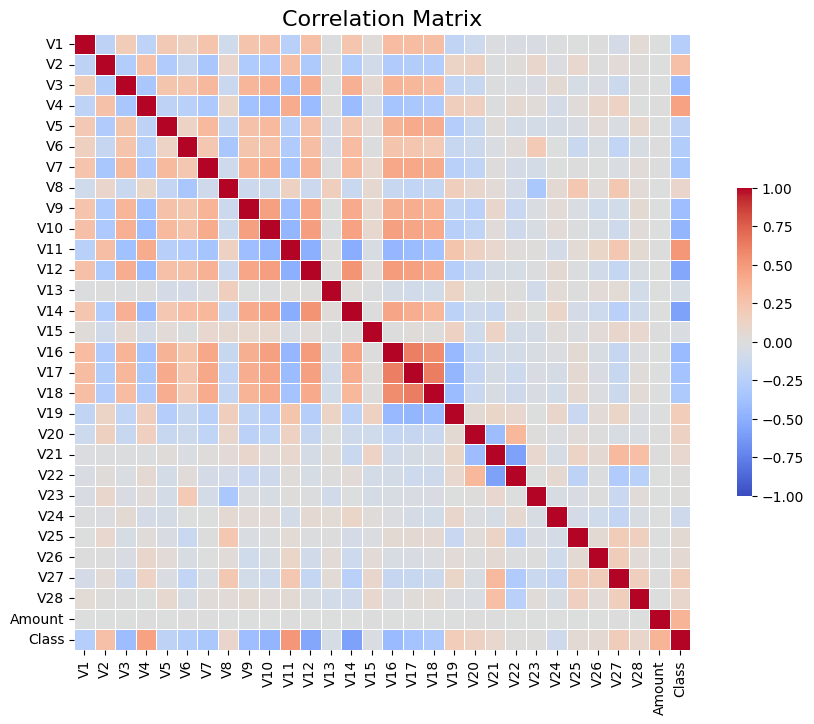

In [ ]:
# set up matplotlib figure
plt.figure(figsize=(12, 8))

# draw heatmap with a color bar
sns.heatmap(corr, annot=False, cmap='coolwarm', vmin=-1, vmax=1, square=True,
            linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix', fontsize=16)
plt.show()


### SPLIT TO F&L

In [ ]:
# spliting data into features and target
x = new_df.drop('Class', axis=1)
y = new_df['Class']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
# display shapes of resulting datasets
print("Training set shape:", x_train.shape, y_train.shape)
print("Validation set shape:", x_val.shape, y_val.shape)
print("Test set shape:", x_test.shape, y_test.shape)

# display value counts of target variable in each set
print("y_train value counts:\n", y_train.value_counts())
print("y_val value counts:\n", y_val.value_counts())
print("y_test value counts:\n", y_test.value_counts())

Training set shape: (597405, 29) (597405,)
Validation set shape: (128016, 29) (128016,)
Test set shape: (128016, 29) (128016,)
y_train value counts:
 Class
0    398221
1    199184
Name: count, dtype: int64
y_val value counts:
 Class
0    85242
1    42774
Name: count, dtype: int64
y_test value counts:
 Class
0    85167
1    42849
Name: count, dtype: int64


### FEATURE SELECTION

In [ ]:
from sklearn.feature_selection import f_classif, SelectKBest

# apply ANOVA F-test feature selection
anova_selector = SelectKBest(score_func=f_classif, k='all')
anova_selector.fit(x_train, y_train)

# get f-scores and p-values
anova_scores = pd.DataFrame({'Feature': x_train.columns,
                             'ANOVA F-Score': anova_selector.scores_,
                             'p-Value': anova_selector.pvalues_})

# sort features by f-Score
anova_scores = anova_scores.sort_values(by='ANOVA F-Score', ascending=False)

print(anova_scores)

   Feature  ANOVA F-Score        p-Value
13     V14  311593.032042   0.000000e+00
11     V12  259665.348498   0.000000e+00
10     V11  212969.154291   0.000000e+00
9      V10  167348.205158   0.000000e+00
3       V4  155853.142111   0.000000e+00
15     V16  134179.332339   0.000000e+00
2       V3  120548.703131   0.000000e+00
8       V9  115808.583332   0.000000e+00
16     V17   90738.038453   0.000000e+00
28  Amount   85022.570314   0.000000e+00
6       V7   73913.710434   0.000000e+00
17     V18   63084.358893   0.000000e+00
1       V2   50647.427162   0.000000e+00
5       V6   49317.297233   0.000000e+00
0       V1   43418.184106   0.000000e+00
4       V5   28180.782265   0.000000e+00
18     V19   21134.328856   0.000000e+00
26     V27   19871.011639   0.000000e+00
19     V20   11407.211833   0.000000e+00
23     V24    6420.598575   0.000000e+00
7       V8    5625.894671   0.000000e+00
27     V28    4461.519016   0.000000e+00
20     V21    4346.393343   0.000000e+00
25     V26    19

### CATBOOST

### ON COMBINED VAL

In [ ]:
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report
catboost = CatBoostClassifier()
catboost.fit(x_train, y_train)
print(classification_report(y_val, catboost.predict(x_val), target_names= ['Not Fraud', 'Fraud']))

Learning rate set to 0.157907
0:	learn: 0.4193339	total: 201ms	remaining: 3m 20s
1:	learn: 0.2778140	total: 385ms	remaining: 3m 11s
2:	learn: 0.2037437	total: 552ms	remaining: 3m 3s
3:	learn: 0.1560228	total: 732ms	remaining: 3m 2s
4:	learn: 0.1328956	total: 898ms	remaining: 2m 58s
5:	learn: 0.1187070	total: 1.06s	remaining: 2m 56s
6:	learn: 0.1090414	total: 1.24s	remaining: 2m 56s
7:	learn: 0.1020705	total: 1.41s	remaining: 2m 54s
8:	learn: 0.0964652	total: 1.57s	remaining: 2m 53s
9:	learn: 0.0915804	total: 1.73s	remaining: 2m 51s
10:	learn: 0.0859114	total: 1.91s	remaining: 2m 51s
11:	learn: 0.0827410	total: 2.06s	remaining: 2m 49s
12:	learn: 0.0776164	total: 2.25s	remaining: 2m 50s
13:	learn: 0.0745546	total: 2.41s	remaining: 2m 50s
14:	learn: 0.0718368	total: 2.58s	remaining: 2m 49s
15:	learn: 0.0700953	total: 2.75s	remaining: 2m 49s
16:	learn: 0.0679374	total: 2.91s	remaining: 2m 48s
17:	learn: 0.0648445	total: 3.08s	remaining: 2m 48s
18:	learn: 0.0626509	total: 3.28s	remaining: 2

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_val, catboost.predict(x_val), target_names= ['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     85242
       Fraud       1.00      1.00      1.00     42774

    accuracy                           1.00    128016
   macro avg       1.00      1.00      1.00    128016
weighted avg       1.00      1.00      1.00    128016



In [ ]:
y_pred = catboost.predict(x_val)

<ipython-input-63-8277bb4ad60e>:16: RuntimeWarning: overflow encountered in scalar multiply
  mcc = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
<ipython-input-63-8277bb4ad60e>:16: RuntimeWarning: invalid value encountered in sqrt
  mcc = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))


Accuracy: 0.9995
Sensitivity (Recall): 0.9995
Specificity: 0.9995
Precision: 0.9990
Matthews Correlation Coefficient (MCC): nan
Balanced Classification Rate (BCR): 0.9995


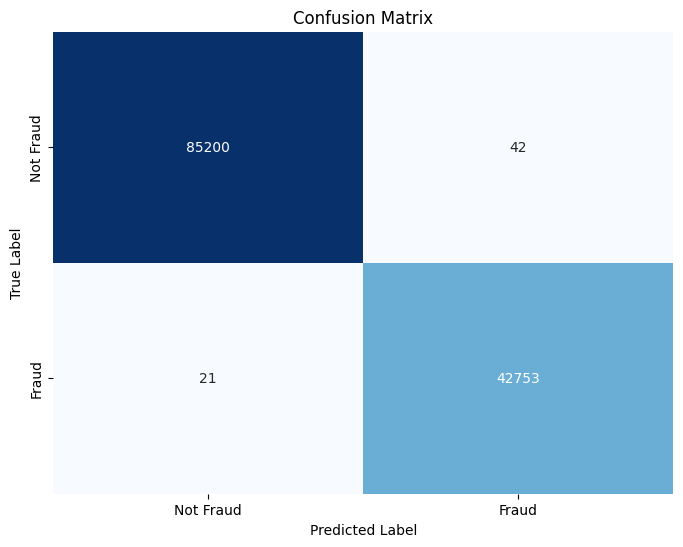

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# confusion Matrix
cm = confusion_matrix(y_val, y_pred)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# calculate metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
precision = TP / (TP + FP)

print(f"Accuracy: {accuracy:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Precision: {precision:.4f}")

cm = confusion_matrix(y_val, y_pred)

# plot cm
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### CAT ON TEST

In [ ]:
y_test_pred = catboost.predict(x_test)
print(classification_report(y_test, y_test_pred, target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     85167
       Fraud       1.00      1.00      1.00     42849

    accuracy                           1.00    128016
   macro avg       1.00      1.00      1.00    128016
weighted avg       1.00      1.00      1.00    128016



Accuracy: 0.9995
Sensitivity (Recall): 0.9996
Specificity: 0.9995
Precision: 0.9990
Matthews Correlation Coefficient (MCC): nan
Balanced Classification Rate (BCR): 0.9995


<ipython-input-65-3c5aa92cc6dd>:13: RuntimeWarning: overflow encountered in scalar multiply
  mcc = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
<ipython-input-65-3c5aa92cc6dd>:13: RuntimeWarning: invalid value encountered in sqrt
  mcc = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))


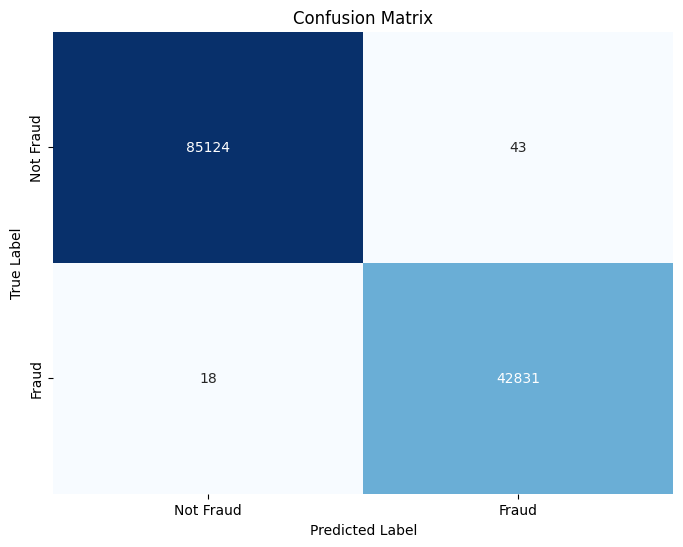

In [ ]:
# confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# calculate metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
precision = TP / (TP + FP)

print(f"Accuracy: {accuracy:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Precision: {precision:.4f}")

cm = confusion_matrix(y_test, y_test_pred)

# plot cm
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### SCALING IMBALANCED DATASET

In [ ]:
# scaling amountcolumn with robustscaler
new_df2=df2.copy()
new_df2['Amount'] = RobustScaler().fit_transform(new_df2['Amount'].to_numpy().reshape(-1,1))
new_df2

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.296653,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.038986,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.641096,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.167680,0


In [ ]:
# reshuffle data
new_df2 = new_df2.sample(frac=1, random_state=1)
new_df2

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
169876,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,0.070050,...,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,-0.282401,0
127467,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,-0.600684,...,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,-0.279746,0
137900,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,-0.528357,...,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,-0.294977,0
21513,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,0.334853,...,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,-0.084119,0
134700,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,-0.696578,...,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,-0.296793,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21440,-2.986845,-8.663978,-1.910863,0.664058,-3.934875,0.861269,1.647511,-0.480963,-1.546866,0.346951,...,1.252092,-0.993085,-2.173147,0.145570,-0.235062,-0.227411,-0.382702,0.404045,32.002515,0
117583,0.937083,-0.849673,0.524186,-0.020031,-0.606327,0.692302,-0.463724,0.148857,0.785062,-0.400162,...,-0.143322,-0.479981,-0.237902,-0.715247,0.251418,0.975406,-0.060168,0.023771,2.086495,0
73349,-1.149963,1.696462,1.637114,2.658991,-0.021502,0.192287,0.205204,0.588754,-1.187820,-0.480985,...,0.025147,0.086506,-0.262748,0.321538,0.341667,0.210343,-0.162047,0.031193,-0.201495,0
267336,1.754554,-0.699398,-0.076332,0.443915,-0.672082,0.389061,-0.807534,0.202915,0.858635,0.102675,...,0.141950,0.358412,0.259748,0.746839,-0.560808,0.104636,-0.005853,-0.019622,1.017257,0


In [ ]:
X_new_df2 = new_df2.drop('Class', axis=1)
y_new_df2 = new_df2['Class']

In [ ]:
from sklearn.feature_selection import f_classif, SelectKBest

# apply ANOVA f-test feature selection
anova_selector = SelectKBest(score_func=f_classif, k='all')
anova_selector.fit(X_new_df2, y_new_df2)

# get f-scores and p-values
anova_scores = pd.DataFrame({'Feature': x_train.columns,
                             'ANOVA F-Score': anova_selector.scores_,
                             'p-Value': anova_selector.pvalues_})

# sort features by F-Score
anova_scores = anova_scores.sort_values(by='ANOVA F-Score', ascending=False)

print(anova_scores)

   Feature  ANOVA F-Score        p-Value
16     V17   33979.168593   0.000000e+00
13     V14   28695.547788   0.000000e+00
11     V12   20749.822361   0.000000e+00
9      V10   14057.979985   0.000000e+00
15     V16   11443.349428   0.000000e+00
2       V3   11014.508305   0.000000e+00
6       V7   10349.605408   0.000000e+00
10     V11    6999.355047   0.000000e+00
3       V4    5163.832114   0.000000e+00
17     V18    3584.380605   0.000000e+00
0       V1    2955.668946   0.000000e+00
8       V9    2746.600273   0.000000e+00
4       V5    2592.357929   0.000000e+00
1       V2    2393.401678   0.000000e+00
5       V6     543.510578  4.213111e-120
20     V21     465.916251  3.002269e-103
18     V19     344.990997   5.801517e-77
19     V20     114.999731   7.964292e-27
7       V8     112.548287   2.740673e-26
26     V27      88.045296   6.441920e-21
27     V28      25.901405   3.595354e-07
23     V24      14.850932   1.163760e-04
28  Amount       9.033345   2.651221e-03
12     V13      

### CAT ON IMBALANCED

In [ ]:
y_new_df2_pred_cat = catboost.predict(X_new_df2)
print(classification_report(y_new_df2, y_new_df2_pred_cat, target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      0.99      0.99    284315
       Fraud       0.13      0.94      0.23       492

    accuracy                           0.99    284807
   macro avg       0.56      0.97      0.61    284807
weighted avg       1.00      0.99      0.99    284807



Accuracy: 0.9888
Sensitivity (Recall): 0.9431
Specificity: 0.9889
Precision: 0.1282
Matthews Correlation Coefficient (MCC): 0.3455
Balanced Classification Rate (BCR): 0.9660


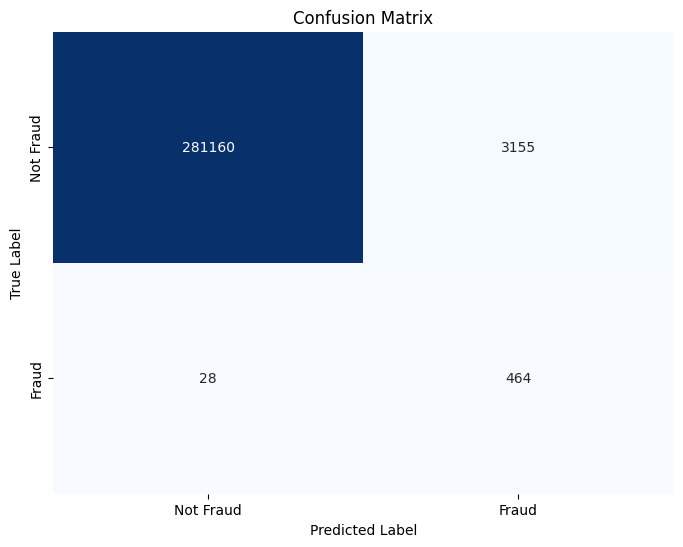

In [ ]:
# confusion matrix
cm = confusion_matrix(y_new_df2, y_new_df2_pred_cat)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# calculate metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
precision = TP / (TP + FP)

print(f"Accuracy: {accuracy:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Precision: {precision:.4f}")

# plot cm
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### XGB ON COMBINED

In [ ]:
from xgboost import XGBClassifier

xgboost = XGBClassifier()

xgboost.fit(x_train, y_train)

y_pred = xgboost.predict(x_val)

print(classification_report(y_val, y_pred, target_names= ['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     85242
       Fraud       1.00      1.00      1.00     42774

    accuracy                           1.00    128016
   macro avg       1.00      1.00      1.00    128016
weighted avg       1.00      1.00      1.00    128016



Accuracy: 0.9996
Sensitivity (Recall): 0.9995
Specificity: 0.9996
Precision: 0.9993
Matthews Correlation Coefficient (MCC): nan
Balanced Classification Rate (BCR): 0.9996


<ipython-input-73-fe69426c1a82>:15: RuntimeWarning: overflow encountered in scalar multiply
  mcc = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
<ipython-input-73-fe69426c1a82>:15: RuntimeWarning: invalid value encountered in sqrt
  mcc = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))


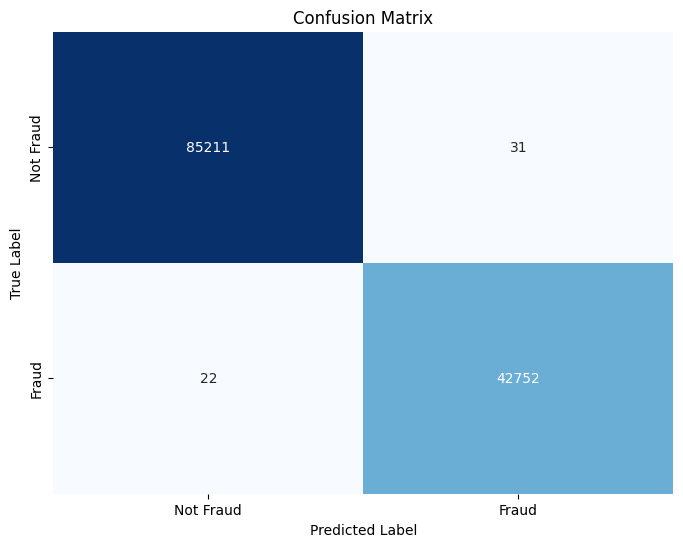

In [ ]:
import numpy as np

# confusion matrix
cm = confusion_matrix(y_val, y_pred)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# calculate metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
precision = TP / (TP + FP)

print(f"Accuracy: {accuracy:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Precision: {precision:.4f}")

cm = confusion_matrix(y_val, y_pred)

# plot cm
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### XGB ON TEST

In [ ]:
y_test_pred = xgboost.predict(x_test)
print(classification_report(y_test, y_test_pred, target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     85167
       Fraud       1.00      1.00      1.00     42849

    accuracy                           1.00    128016
   macro avg       1.00      1.00      1.00    128016
weighted avg       1.00      1.00      1.00    128016



Accuracy: 0.9997
Sensitivity (Recall): 0.9996
Specificity: 0.9997
Precision: 0.9994
Matthews Correlation Coefficient (MCC): nan
Balanced Classification Rate (BCR): 0.9997


<ipython-input-75-3c5aa92cc6dd>:13: RuntimeWarning: overflow encountered in scalar multiply
  mcc = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
<ipython-input-75-3c5aa92cc6dd>:13: RuntimeWarning: invalid value encountered in sqrt
  mcc = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))


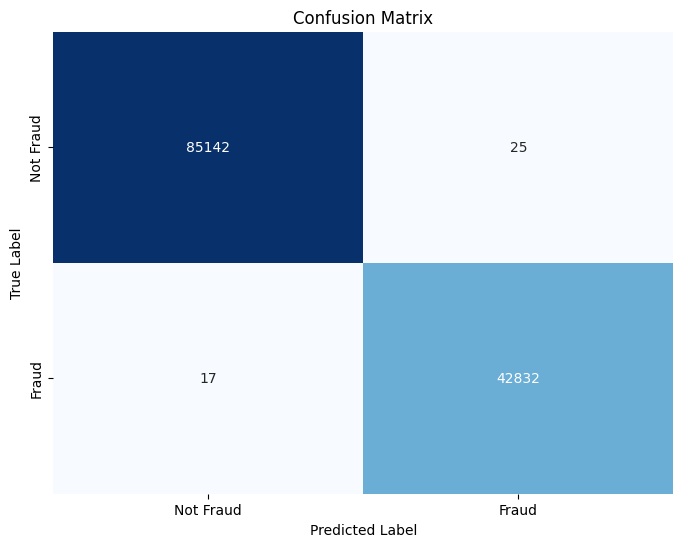

In [ ]:
# confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# calculate metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
precision = TP / (TP + FP)

print(f"Accuracy: {accuracy:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Precision: {precision:.4f}")

cm = confusion_matrix(y_test, y_test_pred)

# plot cm
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### XGB ON IMBALANCED

In [ ]:
y_new_df2_pred_xgb = xgboost.predict(X_new_df2)
print(classification_report(y_new_df2, y_new_df2_pred_xgb, target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      0.97      0.98    284315
       Fraud       0.05      0.97      0.09       492

    accuracy                           0.97    284807
   macro avg       0.52      0.97      0.54    284807
weighted avg       1.00      0.97      0.98    284807



Accuracy: 0.9665
Sensitivity (Recall): 0.9675
Specificity: 0.9665
Precision: 0.0475
Matthews Correlation Coefficient (MCC): 0.2106
Balanced Classification Rate (BCR): 0.9670


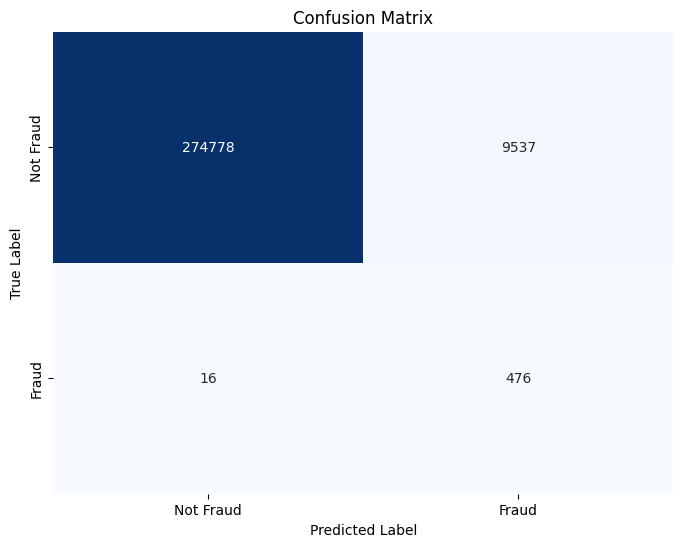

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_new_df2, y_new_df2_pred_xgb)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Calculate additional metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
precision = TP / (TP + FP)
mcc = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
bcr = (sensitivity + specificity) / 2

# Print the additional metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")
print(f"Balanced Classification Rate (BCR): {bcr:.4f}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### GBC ON COMBINED

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=1, random_state=0)
gbc.fit(x_train, y_train)
y_pred = gbc.predict(x_val)
print(classification_report(y_val, y_pred, target_names= ['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.98      0.99      0.98     85242
       Fraud       0.98      0.95      0.96     42774

    accuracy                           0.98    128016
   macro avg       0.98      0.97      0.97    128016
weighted avg       0.98      0.98      0.98    128016



Accuracy: 0.9765
Sensitivity (Recall): 0.9500
Specificity: 0.9897
Precision: 0.9789
Matthews Correlation Coefficient (MCC): nan
Balanced Classification Rate (BCR): 0.9699


<ipython-input-80-ec448a19298e>:12: RuntimeWarning: overflow encountered in scalar multiply
  mcc = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
<ipython-input-80-ec448a19298e>:12: RuntimeWarning: invalid value encountered in sqrt
  mcc = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))


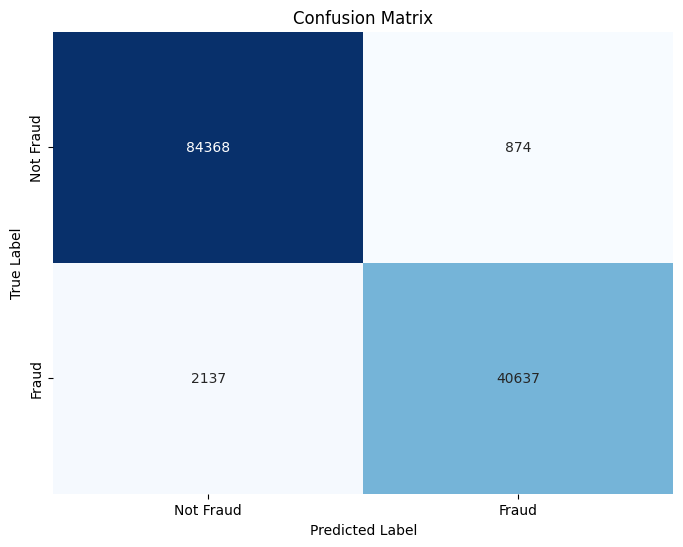

In [ ]:
cm = confusion_matrix(y_val, y_pred)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# calculate metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
precision = TP / (TP + FP)

print(f"Accuracy: {accuracy:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Precision: {precision:.4f}")


# plot cm
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### GBC ON TEST

In [ ]:
y_test_pred = gbc.predict(x_test)
print(classification_report(y_test, y_test_pred, target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.98      0.99      0.98     85167
       Fraud       0.98      0.95      0.96     42849

    accuracy                           0.98    128016
   macro avg       0.98      0.97      0.97    128016
weighted avg       0.98      0.98      0.98    128016



Accuracy: 0.9764
Sensitivity (Recall): 0.9496
Specificity: 0.9898
Precision: 0.9791
Matthews Correlation Coefficient (MCC): nan
Balanced Classification Rate (BCR): 0.9697


<ipython-input-82-3c5aa92cc6dd>:13: RuntimeWarning: overflow encountered in scalar multiply
  mcc = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
<ipython-input-82-3c5aa92cc6dd>:13: RuntimeWarning: invalid value encountered in sqrt
  mcc = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))


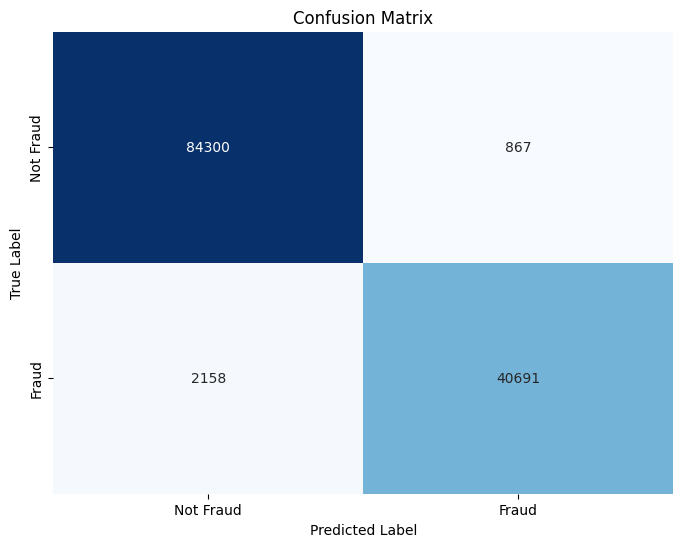

In [ ]:
# confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# calculate metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
precision = TP / (TP + FP)

print(f"Accuracy: {accuracy:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Precision: {precision:.4f}")

cm = confusion_matrix(y_test, y_test_pred)

# Plot cm
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### GBC ON IMBALANCED

In [ ]:
y_new_df2_pred_gbc = gbc.predict(X_new_df2)
print(classification_report(y_new_df2, y_new_df2_pred_gbc, target_names= ['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      0.66      0.80    284315
       Fraud       0.01      0.98      0.01       492

    accuracy                           0.66    284807
   macro avg       0.50      0.82      0.40    284807
weighted avg       1.00      0.66      0.80    284807



Accuracy: 0.6643
Sensitivity (Recall): 0.9776
Specificity: 0.6638
Precision: 0.0050
Matthews Correlation Coefficient (MCC): 0.0563
Balanced Classification Rate (BCR): 0.8207


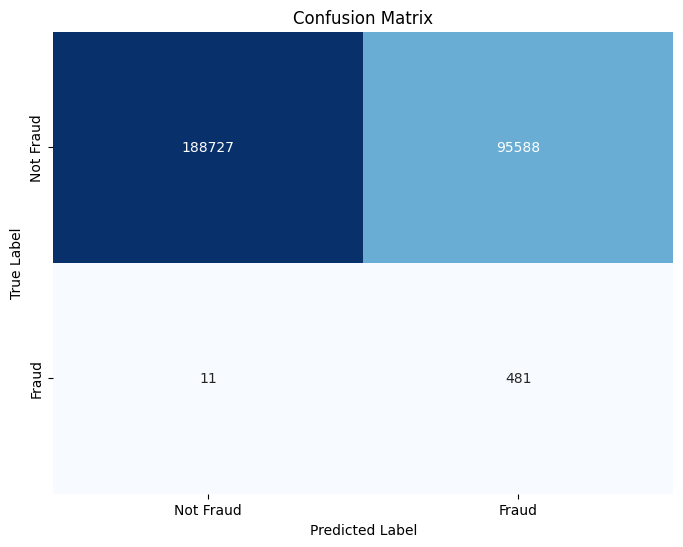

In [ ]:

# confusion matrix
cm = confusion_matrix(y_new_df2, y_new_df2_pred_gbc)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# calculate metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
precision = TP / (TP + FP)

# Print the additional metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Precision: {precision:.4f}")

# plot cm
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Extra Analysis

In [ ]:
# get predicted probabilities for fraud class
y_new_df2_pred_prob_gbc = gbc.predict_proba(X_new_df2)[:, 1]

y_new_df2_pred_prob_xgb = xgboost.predict_proba(X_new_df2)[:, 1]

y_new_df2_pred_prob_cat = catboost.predict_proba(X_new_df2)[:, 1]

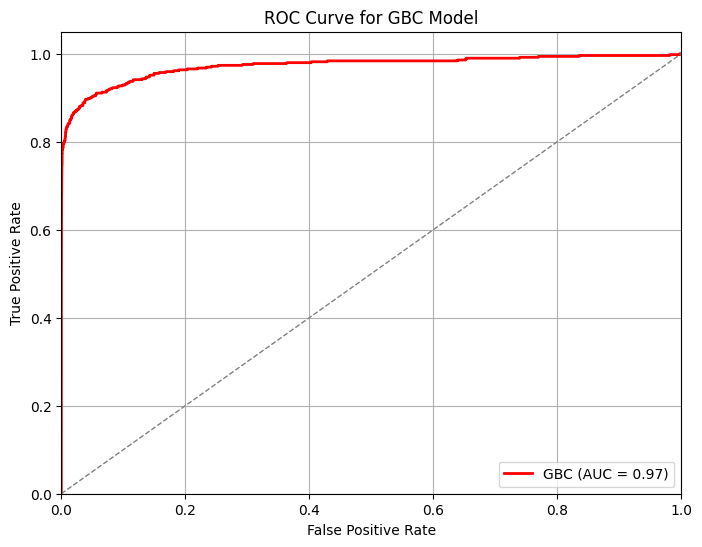

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# compute ROC Curve
fpr_gbc, tpr_gbc, _ = roc_curve(y_new_df2, y_new_df2_pred_prob_gbc)

# calculate AUC
auc_gbc = roc_auc_score(y_new_df2, y_new_df2_pred_prob_gbc)

# plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_gbc, tpr_gbc, label=f'GBC (AUC = {auc_gbc:.2f})', color='red', lw=2)
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for GBC Model')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


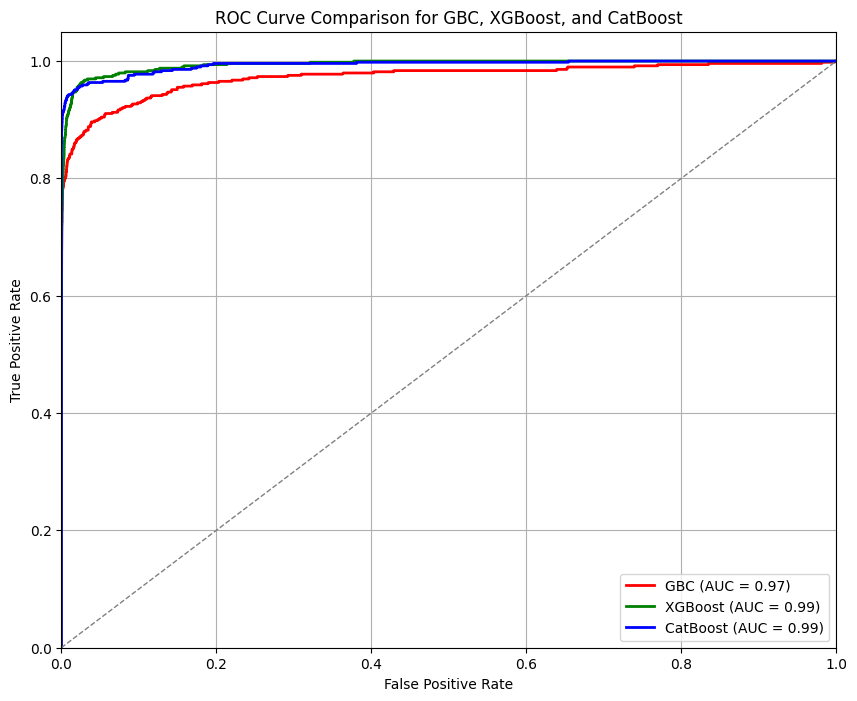

In [ ]:
# compute ROC curve and AUC for gbc
fpr_gbc, tpr_gbc, _ = roc_curve(y_new_df2, y_new_df2_pred_prob_gbc)
auc_gbc = roc_auc_score(y_new_df2, y_new_df2_pred_prob_gbc)

# compute ROC curve and AUC for XGB
fpr_xgb, tpr_xgb, _ = roc_curve(y_new_df2, y_new_df2_pred_prob_xgb)
auc_xgb = roc_auc_score(y_new_df2, y_new_df2_pred_prob_xgb)

# compute ROC Curve and AUC for CatBoost
fpr_cat, tpr_cat, _ = roc_curve(y_new_df2, y_new_df2_pred_prob_cat)
auc_cat = roc_auc_score(y_new_df2, y_new_df2_pred_prob_cat)


plt.figure(figsize=(10, 8))

# plot ROC curves
plt.plot(fpr_gbc, tpr_gbc, label=f'GBC (AUC = {auc_gbc:.2f})', color='red', lw=2)

plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})', color='green', lw=2)

plt.plot(fpr_cat, tpr_cat, label=f'CatBoost (AUC = {auc_cat:.2f})', color='blue', lw=2)

# plot diagonal line (random guessing)
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison for GBC, XGBoost, and CatBoost')
plt.legend(loc='lower right')
plt.grid(True)

plt.show()


### Dropped Columns

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/Disso/creditcard_2023.csv')
df_test

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1


In [ ]:
df_test.drop(columns=['id'], inplace=True)

In [ ]:
df2_test = pd.read_csv('/content/drive/MyDrive/Disso/creditcards.csv')
df2_test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
df2_test = df2_test.drop(columns=['Time'])

In [ ]:
double_test = pd.concat([df_test, df2_test])
double_test

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
from sklearn.preprocessing import RobustScaler

# scaling amountcolumn with robustscaler
new_df_test=double_test.copy()
new_df_test['Amount'] = RobustScaler().fit_transform(new_df['Amount'].to_numpy().reshape(-1,1))
new_df_test


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,-0.401965,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,0.351838,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,0.858373,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,0.732561,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,-0.025088,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.404343,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.330180,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,1.069291,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0.072486,0


In [ ]:
new_df_test = new_df_test.sample(frac=1, random_state=1)
new_df_test


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
270208,1.718599,-0.589054,-0.185749,-1.052096,1.284316,2.230528,0.122587,0.088083,1.282263,0.339534,...,-0.211029,-0.667493,0.403089,1.220853,-0.814076,-0.617152,-0.186886,-0.138781,-0.403493,0
556627,-0.155695,0.184567,-0.233523,0.156068,0.285978,-0.413230,0.258298,-0.064827,-0.298250,-0.208483,...,0.089087,0.627579,0.037615,-0.265237,-0.816814,-0.999161,0.582540,0.752811,-0.396413,1
384984,-0.473044,-0.771314,-0.609088,0.489438,-0.744186,0.775617,0.391181,-0.542558,0.026346,-0.569952,...,0.018781,-0.512693,-2.660732,0.020217,-0.991074,0.210886,0.893675,0.049897,0.300046,1
101170,1.042766,-0.457301,0.744927,-0.755154,0.071905,0.183963,0.345890,-0.161088,0.525314,0.571061,...,-0.141421,-0.280793,0.011065,0.202138,0.169551,1.816592,-0.317258,-0.105551,1.063003,0
176373,-1.956574,2.101941,0.453091,-1.159029,0.018464,-0.883012,0.706348,-0.354128,1.854630,1.034015,...,-0.464003,-0.552554,-0.012995,-0.080070,0.038542,-0.370348,-0.333400,-0.323682,-0.400096,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491263,-1.003034,0.523233,-0.850480,0.458508,-0.866442,-0.191992,-0.451548,0.395405,-1.003115,-0.521047,...,0.317286,-0.768852,0.575190,-0.081693,-0.316467,3.016707,-0.926670,-0.536904,-0.404040,1
222994,-0.968684,1.223178,0.244740,-1.728395,1.722377,-0.408492,1.332043,-0.097056,-0.614712,-1.555587,...,0.193509,0.499596,-0.865807,-1.214576,1.305559,-0.120824,-0.131202,0.028431,-0.242987,0
470924,-1.225451,1.101467,-1.371140,1.778787,-1.574868,-1.316516,-1.470957,1.117979,-1.577911,-1.762436,...,0.673122,-0.144433,0.046915,1.344879,-0.900736,-0.153491,0.489000,0.000870,-0.328769,1
491755,-0.567088,0.107062,-0.489293,-0.032639,-0.094631,-0.286657,-0.114300,-0.046510,-0.377900,-0.626601,...,0.227869,1.159191,-0.106405,-0.678466,-0.155266,-0.051364,0.010843,0.066338,-0.404263,1


In [ ]:
new_df_test.drop(columns=['V13', 'V25', 'V15', 'V22', 'V23'], inplace=True)

In [ ]:
new_df_test

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V18,V19,V20,V21,V24,V26,V27,V28,Amount,Class
270208,1.718599,-0.589054,-0.185749,-1.052096,1.284316,2.230528,0.122587,0.088083,1.282263,0.339534,...,0.411502,-0.455474,-0.267183,-0.211029,1.220853,-0.617152,-0.186886,-0.138781,-0.403493,0
556627,-0.155695,0.184567,-0.233523,0.156068,0.285978,-0.413230,0.258298,-0.064827,-0.298250,-0.208483,...,-0.120118,0.403913,0.139303,0.089087,-0.265237,-0.999161,0.582540,0.752811,-0.396413,1
384984,-0.473044,-0.771314,-0.609088,0.489438,-0.744186,0.775617,0.391181,-0.542558,0.026346,-0.569952,...,-0.058890,0.323004,1.107702,0.018781,0.020217,0.210886,0.893675,0.049897,0.300046,1
101170,1.042766,-0.457301,0.744927,-0.755154,0.071905,0.183963,0.345890,-0.161088,0.525314,0.571061,...,0.381653,0.150660,-0.157712,-0.141421,0.202138,1.816592,-0.317258,-0.105551,1.063003,0
176373,-1.956574,2.101941,0.453091,-1.159029,0.018464,-0.883012,0.706348,-0.354128,1.854630,1.034015,...,0.068280,-0.498896,0.776140,-0.464003,-0.080070,-0.370348,-0.333400,-0.323682,-0.400096,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491263,-1.003034,0.523233,-0.850480,0.458508,-0.866442,-0.191992,-0.451548,0.395405,-1.003115,-0.521047,...,-0.928232,0.031004,-1.482726,0.317286,-0.081693,3.016707,-0.926670,-0.536904,-0.404040,1
222994,-0.968684,1.223178,0.244740,-1.728395,1.722377,-0.408492,1.332043,-0.097056,-0.614712,-1.555587,...,1.206546,-0.963908,-0.166567,0.193509,-1.214576,-0.120824,-0.131202,0.028431,-0.242987,0
470924,-1.225451,1.101467,-1.371140,1.778787,-1.574868,-1.316516,-1.470957,1.117979,-1.577911,-1.762436,...,-2.231211,1.644405,-0.418995,0.673122,1.344879,-0.153491,0.489000,0.000870,-0.328769,1
491755,-0.567088,0.107062,-0.489293,-0.032639,-0.094631,-0.286657,-0.114300,-0.046510,-0.377900,-0.626601,...,-0.486929,0.885592,-0.092499,0.227869,-0.678466,-0.051364,0.010843,0.066338,-0.404263,1


In [ ]:
# spliting data into features and target
x = new_df_test.drop('Class', axis=1)
y = new_df_test['Class']


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
# display shapes of resulting datasets
print("Training set shape:", x_train.shape, y_train.shape)
print("Validation set shape:", x_val.shape, y_val.shape)
print("Test set shape:", x_test.shape, y_test.shape)

# display value counts of target variable in each set
print("y_train value counts:\n", y_train.value_counts())
print("y_val value counts:\n", y_val.value_counts())
print("y_test value counts:\n", y_test.value_counts())

Training set shape: (597405, 24) (597405,)
Validation set shape: (128016, 24) (128016,)
Test set shape: (128016, 24) (128016,)
y_train value counts:
 Class
0    398221
1    199184
Name: count, dtype: int64
y_val value counts:
 Class
0    85242
1    42774
Name: count, dtype: int64
y_test value counts:
 Class
0    85167
1    42849
Name: count, dtype: int64


In [ ]:
df2_test.drop(columns=['V13', 'V25', 'V15', 'V22', 'V23'], inplace=True)

In [ ]:
# scaling amountcolumn with robustscaler
new_df2_test=df2_test.copy()
new_df2_test['Amount'] = RobustScaler().fit_transform(new_df2['Amount'].to_numpy().reshape(-1,1))
new_df2_test

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V18,V19,V20,V21,V24,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.025791,0.403993,0.251412,-0.018307,0.066928,-0.189115,0.133558,-0.021053,-0.282401,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.183361,-0.145783,-0.069083,-0.225775,-0.339846,0.125895,-0.008983,0.014724,-0.279746,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-0.121359,-2.261857,0.524980,0.247998,-0.689281,-0.139097,-0.055353,-0.059752,-0.294977,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,1.965775,-1.232622,-0.208038,-0.108300,-1.175575,-0.221929,0.062723,0.061458,-0.084119,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.038195,0.803487,0.408542,-0.009431,0.141267,0.502292,0.219422,0.215153,-0.296793,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.510632,-0.682920,1.475829,0.213454,-0.509348,0.250034,0.943651,0.823731,32.002515,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,-1.221179,-1.545556,0.059616,0.214205,-1.016226,-0.395255,0.068472,-0.053527,2.086495,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.395652,-0.577252,0.001396,0.232045,0.640134,-0.087371,0.004455,-0.026561,-0.201495,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,1.113981,2.897849,0.127434,0.265245,0.123205,0.546668,0.108821,0.104533,1.017257,0


In [ ]:
X_new_df2 = new_df2_test.drop('Class', axis=1)
y_new_df2 = new_df2_test['Class']

### New CatBoost on val

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report
catboost = CatBoostClassifier()
catboost.fit(x_train, y_train)
print(classification_report(y_val, catboost.predict(x_val), target_names= ['Not Fraud', 'Fraud']))


Learning rate set to 0.157907
0:	learn: 0.4563280	total: 180ms	remaining: 3m
1:	learn: 0.3294264	total: 339ms	remaining: 2m 49s
2:	learn: 0.2465636	total: 516ms	remaining: 2m 51s
3:	learn: 0.2056851	total: 757ms	remaining: 3m 8s
4:	learn: 0.1752871	total: 1.08s	remaining: 3m 35s
5:	learn: 0.1556445	total: 1.38s	remaining: 3m 48s
6:	learn: 0.1402723	total: 1.66s	remaining: 3m 55s
7:	learn: 0.1307458	total: 1.95s	remaining: 4m 1s
8:	learn: 0.1210752	total: 2.25s	remaining: 4m 7s
9:	learn: 0.1138540	total: 2.56s	remaining: 4m 13s
10:	learn: 0.1072814	total: 2.87s	remaining: 4m 18s
11:	learn: 0.1018494	total: 3.13s	remaining: 4m 18s
12:	learn: 0.0957902	total: 3.46s	remaining: 4m 22s
13:	learn: 0.0912297	total: 3.76s	remaining: 4m 25s
14:	learn: 0.0884543	total: 4.04s	remaining: 4m 25s
15:	learn: 0.0840096	total: 4.34s	remaining: 4m 26s
16:	learn: 0.0801727	total: 4.65s	remaining: 4m 28s
17:	learn: 0.0774553	total: 4.94s	remaining: 4m 29s
18:	learn: 0.0736465	total: 5.27s	remaining: 4m 31s

<ipython-input-123-8277bb4ad60e>:16: RuntimeWarning: overflow encountered in scalar multiply
  mcc = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
<ipython-input-123-8277bb4ad60e>:16: RuntimeWarning: invalid value encountered in sqrt
  mcc = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))


Accuracy: 0.9995
Sensitivity (Recall): 0.9995
Specificity: 0.9994
Precision: 0.9989
Matthews Correlation Coefficient (MCC): nan
Balanced Classification Rate (BCR): 0.9995


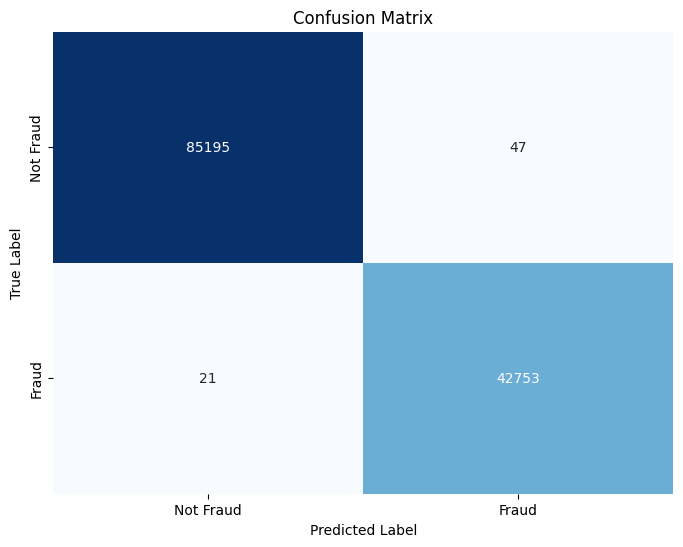

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# confusion matrix
cm = confusion_matrix(y_val, y_pred)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# calculate metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
precision = TP / (TP + FP)

print(f"Accuracy: {accuracy:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Precision: {precision:.4f}")

cm = confusion_matrix(y_val, y_pred)

# plot cm
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### New CatBoost on test

In [ ]:
y_test_pred = catboost.predict(x_test)
print(classification_report(y_test, y_test_pred, target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     85167
       Fraud       1.00      1.00      1.00     42849

    accuracy                           1.00    128016
   macro avg       1.00      1.00      1.00    128016
weighted avg       1.00      1.00      1.00    128016



<ipython-input-125-3c5aa92cc6dd>:13: RuntimeWarning: overflow encountered in scalar multiply
  mcc = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
<ipython-input-125-3c5aa92cc6dd>:13: RuntimeWarning: invalid value encountered in sqrt
  mcc = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))


Accuracy: 0.9995
Sensitivity (Recall): 0.9996
Specificity: 0.9994
Precision: 0.9988
Matthews Correlation Coefficient (MCC): nan
Balanced Classification Rate (BCR): 0.9995


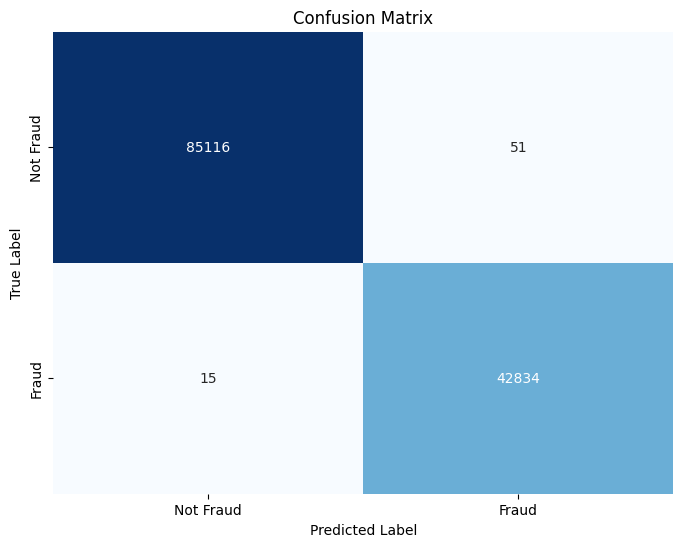

In [ ]:
# confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# calculate metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
precision = TP / (TP + FP)

print(f"Accuracy: {accuracy:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Precision: {precision:.4f}")

cm = confusion_matrix(y_test, y_test_pred)

# plot cm
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### New CatBoost on Imbalanced

In [ ]:
y_new_df2_pred_cat = catboost.predict(X_new_df2)
print(classification_report(y_new_df2, y_new_df2_pred_cat, target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00    284315
       Fraud       0.91      0.85      0.88       492

    accuracy                           1.00    284807
   macro avg       0.95      0.93      0.94    284807
weighted avg       1.00      1.00      1.00    284807



Accuracy: 0.9996
Sensitivity (Recall): 0.8537
Specificity: 0.9999
Precision: 0.9091
Matthews Correlation Coefficient (MCC): 0.8807
Balanced Classification Rate (BCR): 0.9268


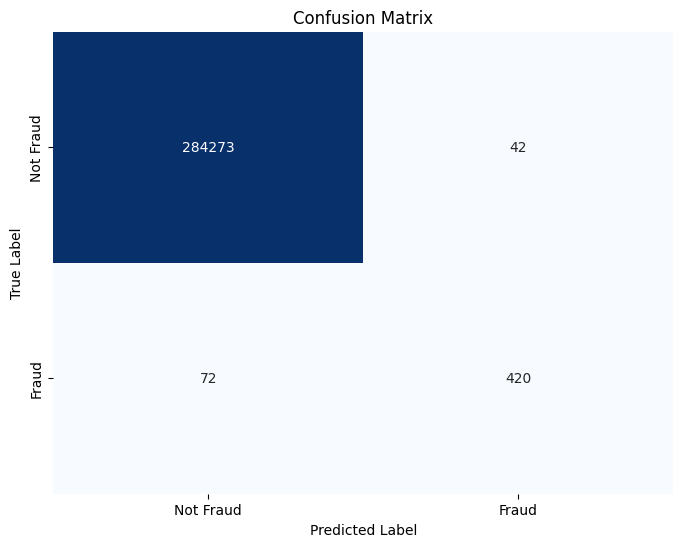

In [ ]:
# confusion matrix
cm = confusion_matrix(y_new_df2, y_new_df2_pred_cat)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Calculate metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
precision = TP / (TP + FP)

print(f"Accuracy: {accuracy:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Precision: {precision:.4f}")

# plot cm
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### New XGB on val

In [ ]:
from xgboost import XGBClassifier

xgboost = XGBClassifier()

xgboost.fit(x_train, y_train)

y_pred = xgboost.predict(x_val)

print(classification_report(y_val, y_pred, target_names= ['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     85242
       Fraud       1.00      1.00      1.00     42774

    accuracy                           1.00    128016
   macro avg       1.00      1.00      1.00    128016
weighted avg       1.00      1.00      1.00    128016



<ipython-input-120-fe69426c1a82>:15: RuntimeWarning: overflow encountered in scalar multiply
  mcc = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
<ipython-input-120-fe69426c1a82>:15: RuntimeWarning: invalid value encountered in sqrt
  mcc = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))


Accuracy: 0.9995
Sensitivity (Recall): 0.9995
Specificity: 0.9994
Precision: 0.9989
Matthews Correlation Coefficient (MCC): nan
Balanced Classification Rate (BCR): 0.9995


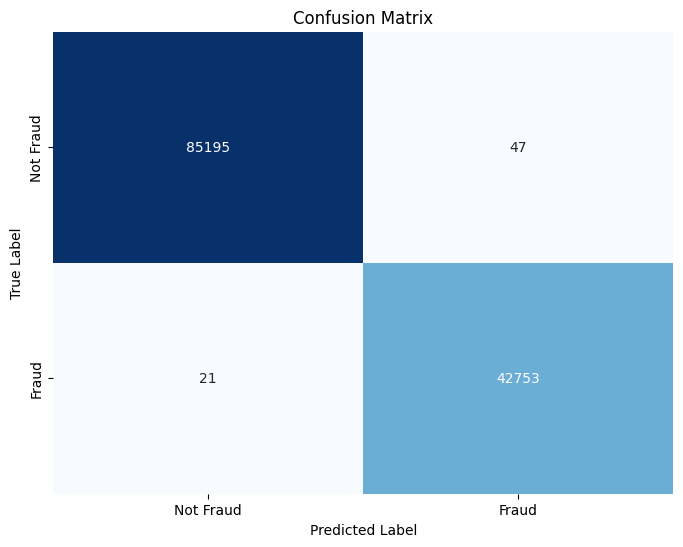

In [ ]:
# confusion matrix
cm = confusion_matrix(y_val, y_pred)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# calculate metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
precision = TP / (TP + FP)

print(f"Accuracy: {accuracy:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Precision: {precision:.4f}")

cm = confusion_matrix(y_val, y_pred)

# plot cm
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### NEW XGB on test

In [ ]:
y_test_pred = xgboost.predict(x_test)
print(classification_report(y_test, y_test_pred, target_names=['Not Fraud', 'Fraud']))


              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     85167
       Fraud       1.00      1.00      1.00     42849

    accuracy                           1.00    128016
   macro avg       1.00      1.00      1.00    128016
weighted avg       1.00      1.00      1.00    128016



<ipython-input-131-3c5aa92cc6dd>:13: RuntimeWarning: overflow encountered in scalar multiply
  mcc = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
<ipython-input-131-3c5aa92cc6dd>:13: RuntimeWarning: invalid value encountered in sqrt
  mcc = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))


Accuracy: 0.9995
Sensitivity (Recall): 0.9996
Specificity: 0.9995
Precision: 0.9990
Matthews Correlation Coefficient (MCC): nan
Balanced Classification Rate (BCR): 0.9995


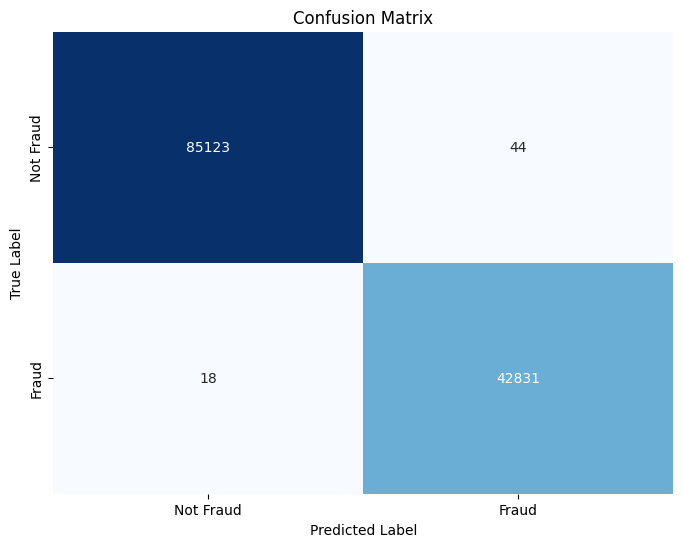

In [ ]:
# confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# calculate metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
precision = TP / (TP + FP)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Precision: {precision:.4f}")

cm = confusion_matrix(y_test, y_test_pred)

# plot cm
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


### NEW XGB on imbalanced

In [ ]:
y_new_df2_pred_xgb = xgboost.predict(X_new_df2)
print(classification_report(y_new_df2, y_new_df2_pred_xgb, target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00    284315
       Fraud       0.93      0.87      0.90       492

    accuracy                           1.00    284807
   macro avg       0.97      0.93      0.95    284807
weighted avg       1.00      1.00      1.00    284807



Accuracy: 0.9997
Sensitivity (Recall): 0.8659
Specificity: 0.9999
Precision: 0.9342
Matthews Correlation Coefficient (MCC): 0.8992
Balanced Classification Rate (BCR): 0.9329


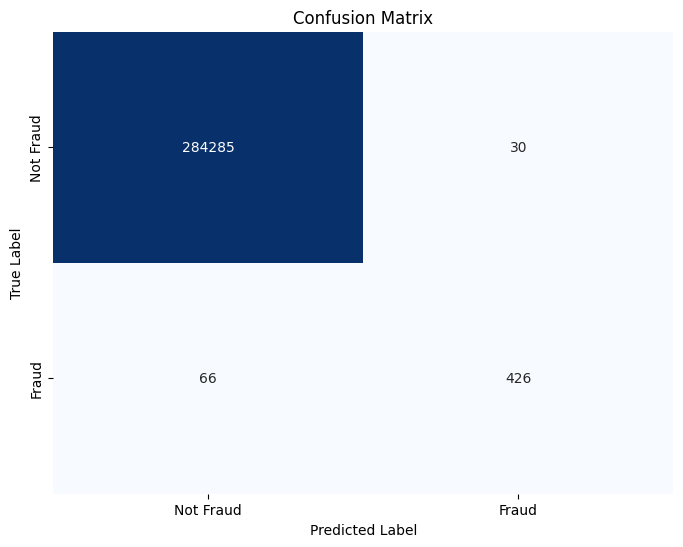

In [ ]:
# confusion matrix
cm = confusion_matrix(y_new_df2, y_new_df2_pred_xgb)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# calculate metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
precision = TP / (TP + FP)

print(f"Accuracy: {accuracy:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Precision: {precision:.4f}")

# plot cm
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


### New GBC on val

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=1, random_state=0)
gbc.fit(x_train, y_train)
y_pred = gbc.predict(x_val)
print(classification_report(y_val, y_pred, target_names= ['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.97      0.98      0.98     85242
       Fraud       0.96      0.94      0.95     42774

    accuracy                           0.97    128016
   macro avg       0.97      0.96      0.96    128016
weighted avg       0.97      0.97      0.97    128016



<ipython-input-135-ec448a19298e>:12: RuntimeWarning: overflow encountered in scalar multiply
  mcc = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
<ipython-input-135-ec448a19298e>:12: RuntimeWarning: invalid value encountered in sqrt
  mcc = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))


Accuracy: 0.9676
Sensitivity (Recall): 0.9377
Specificity: 0.9826
Precision: 0.9644
Matthews Correlation Coefficient (MCC): nan
Balanced Classification Rate (BCR): 0.9602


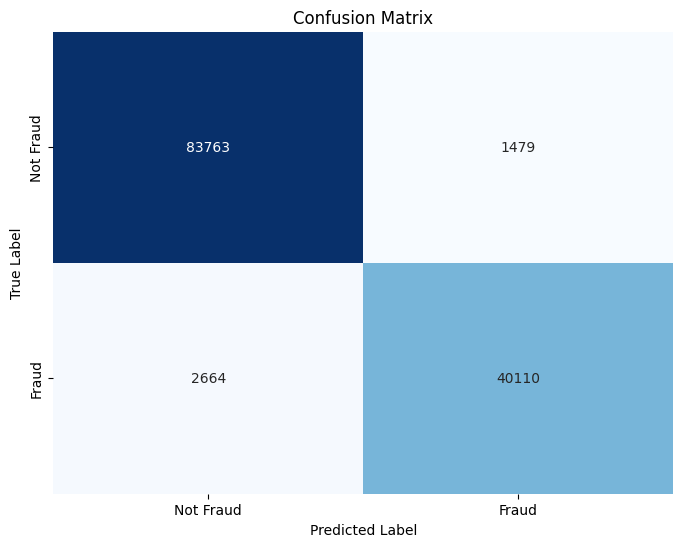

In [ ]:
cm = confusion_matrix(y_val, y_pred)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# calculate metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
precision = TP / (TP + FP)

print(f"Accuracy: {accuracy:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Precision: {precision:.4f}")

# plot cm
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### New GBC on test

In [ ]:
y_test_pred = gbc.predict(x_test)
print(classification_report(y_test, y_test_pred, target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.97      0.98      0.98     85167
       Fraud       0.96      0.94      0.95     42849

    accuracy                           0.97    128016
   macro avg       0.97      0.96      0.96    128016
weighted avg       0.97      0.97      0.97    128016



<ipython-input-137-3c5aa92cc6dd>:13: RuntimeWarning: overflow encountered in scalar multiply
  mcc = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
<ipython-input-137-3c5aa92cc6dd>:13: RuntimeWarning: invalid value encountered in sqrt
  mcc = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))


Accuracy: 0.9675
Sensitivity (Recall): 0.9372
Specificity: 0.9827
Precision: 0.9645
Matthews Correlation Coefficient (MCC): nan
Balanced Classification Rate (BCR): 0.9600


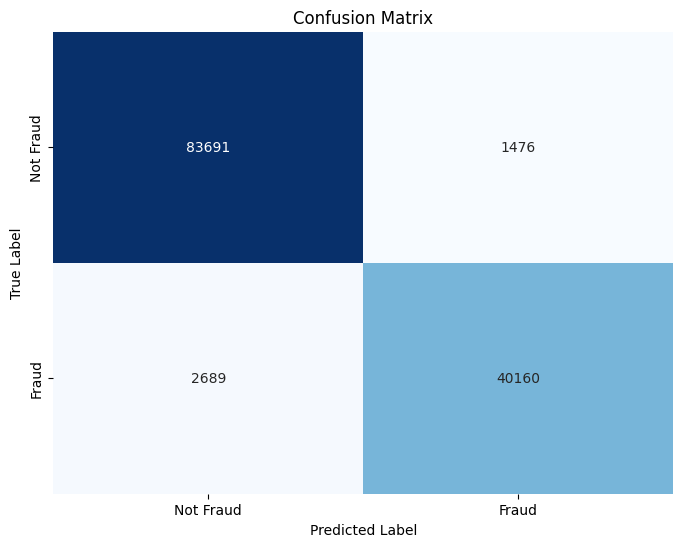

In [ ]:
# confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# calculate metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
precision = TP / (TP + FP)

print(f"Accuracy: {accuracy:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Precision: {precision:.4f}")

cm = confusion_matrix(y_test, y_test_pred)

# plot cm
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### New GBC on imbalanced

In [ ]:
y_new_df2_pred_gbc = gbc.predict(X_new_df2)
print(classification_report(y_new_df2, y_new_df2_pred_gbc, target_names= ['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      0.98      0.99    284315
       Fraud       0.05      0.60      0.09       492

    accuracy                           0.98    284807
   macro avg       0.52      0.79      0.54    284807
weighted avg       1.00      0.98      0.99    284807



Accuracy: 0.9793
Sensitivity (Recall): 0.5955
Specificity: 0.9800
Precision: 0.0490
Matthews Correlation Coefficient (MCC): 0.1667
Balanced Classification Rate (BCR): 0.7878


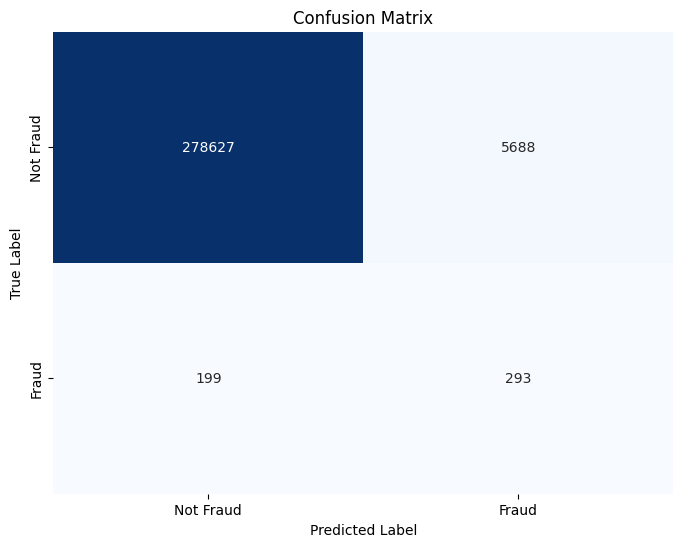

In [ ]:
# confusion matrix
cm = confusion_matrix(y_new_df2, y_new_df2_pred_gbc)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# calculate metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
precision = TP / (TP + FP)

print(f"Accuracy: {accuracy:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Precision: {precision:.4f}")

# Plot cm
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()